# Swish-based classifier using cosine-annealed LR with restarts and data fixing
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is fixed with primary lepton at phi=0 and postive eta and the tau in the positiv phi region
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [2]:
with open(dirLoc + 'features.pkl', 'rb') as fin:
    classTrainFeatures = pickle.load(fin)

In [3]:
nSplits = 10
patience = 2
maxEpochs = 200

ensembleSize = 10
ensembleMode = 'loss'

compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':'modelSwish', 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

print ("\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures])


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [4]:
with open(dirLoc + 'inputPipe.pkl', 'rb') as fin:
    inputPipe = pickle.load(fin)

In [5]:
trainData = BatchYielder(h5py.File(dirLoc + 'train.hdf5', "r+"))

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 13.285s 


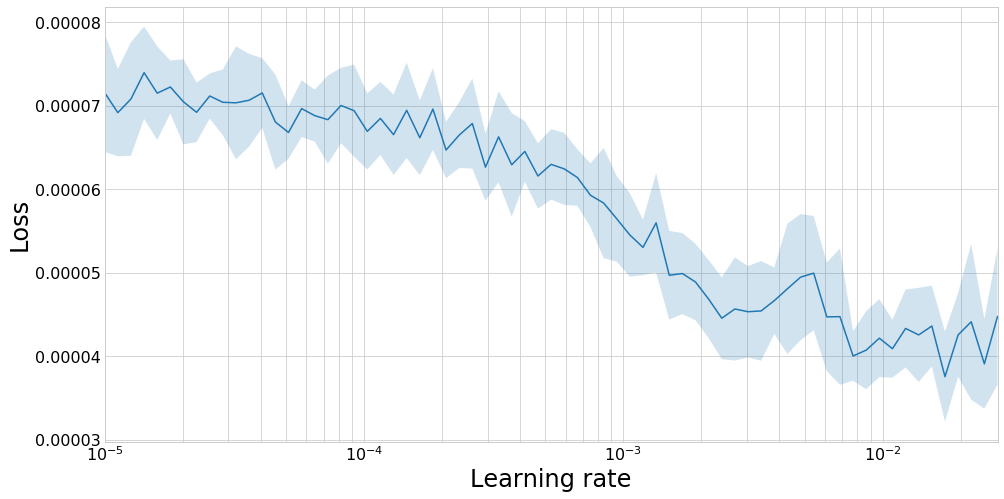

______________________________________



In [6]:
lrFinder = batchLRFind(trainData, getModel, modelParams, trainParams,
                       lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 3.86929836739415e-05
2 New best found: 3.647943555592361e-05
3 New best found: 3.4577553436234576e-05
4 New best found: 3.455136837034314e-05
5 New best found: 3.3895907057180085e-05
6 New best found: 3.338360659878356e-05
7 New best found: 3.333653244419613e-05
11 New best found: 3.303178689870165e-05
12 New best found: 3.263184744256568e-05
14 New best found: 3.255256915649959e-05
15 New best found: 3.253520906974089e-05
23 New best found: 3.250460929359209e-05
25 New best found: 3.242873912967296e-05
27 New best found: 3.230578908041312e-05
28 New best found: 3.2223146359115345e-05
29 New best found: 3.219880008701448e-05
30 New best found: 3.2189436271668564e-05
48 New best found: 3.217142636198869e-05
52 New best found: 3.2128781575826826e-05
53 New best found: 3.197256877764561e-05
57 New best found: 3.1970203616740196e-05
58 New best found: 3.1932453862306

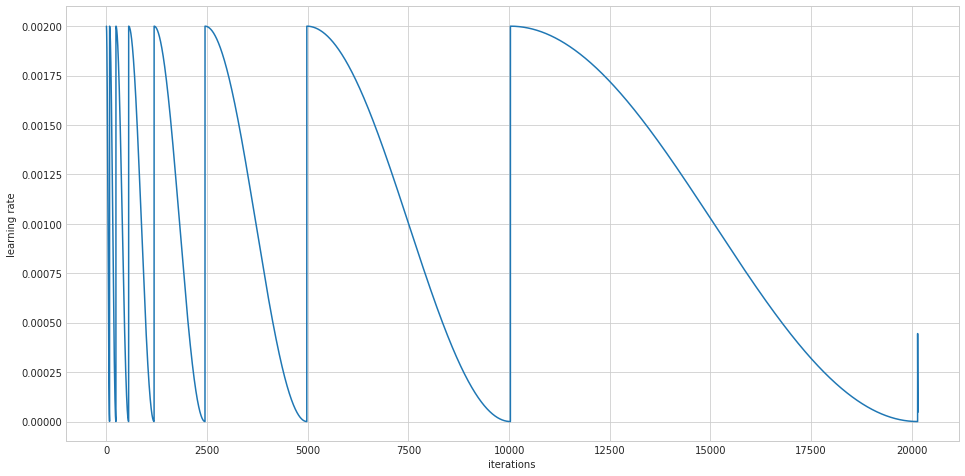

Fold took 207.135s

Running fold 2 / 10
1 New best found: 3.951622153012713e-05
2 New best found: 3.560821556679639e-05
3 New best found: 3.517364309002147e-05
4 New best found: 3.4752265473981416e-05
5 New best found: 3.401695151961861e-05
6 New best found: 3.364727685220068e-05
7 New best found: 3.3487187488025274e-05
10 New best found: 3.3224196101494403e-05
12 New best found: 3.301649594081048e-05
13 New best found: 3.271205424443859e-05
14 New best found: 3.2693230408632014e-05
15 New best found: 3.268961173725017e-05
23 New best found: 3.2683413128835556e-05
25 New best found: 3.24949295030441e-05
26 New best found: 3.2494258102332446e-05
27 New best found: 3.2451385756213476e-05
28 New best found: 3.232117913592977e-05
29 New best found: 3.2248195443304905e-05
30 New best found: 3.2239702537671464e-05
31 New best found: 3.2230450824706615e-05
49 New best found: 3.203514738611154e-05
52 New best found: 3.2002763119718515e-05
55 New best found: 3.1986391436234285e-05
56 New best f

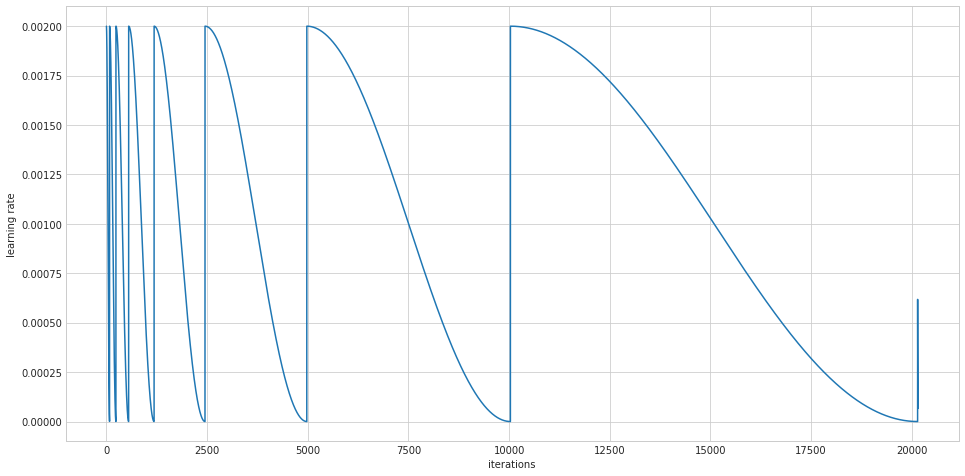

Fold took 205.435s

Running fold 3 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.199356). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100022). Check your callbacks.
  % delta_t_median)


1 New best found: 3.819296518534791e-05
2 New best found: 3.5906120245967085e-05
3 New best found: 3.4912716314213654e-05
4 New best found: 3.488189166739689e-05
5 New best found: 3.425880201579412e-05
6 New best found: 3.357142778226227e-05
7 New best found: 3.355894414984011e-05
10 New best found: 3.3330202394104685e-05
11 New best found: 3.328372127686818e-05
12 New best found: 3.2848481940170675e-05
13 New best found: 3.281410246139734e-05
14 New best found: 3.27113100304933e-05
15 New best found: 3.268380152158839e-05
24 New best found: 3.2621178334380125e-05
25 New best found: 3.2578456861204635e-05
26 New best found: 3.253972068208647e-05
27 New best found: 3.2300477983147846e-05
28 New best found: 3.223098526927614e-05
29 New best found: 3.217095654978024e-05
30 New best found: 3.216268236486755e-05
51 New best found: 3.211704351759648e-05
53 New best found: 3.2107766663123675e-05
54 New best found: 3.2029456844305435e-05
55 New best found: 3.201739311923458e-05
56 New best fou

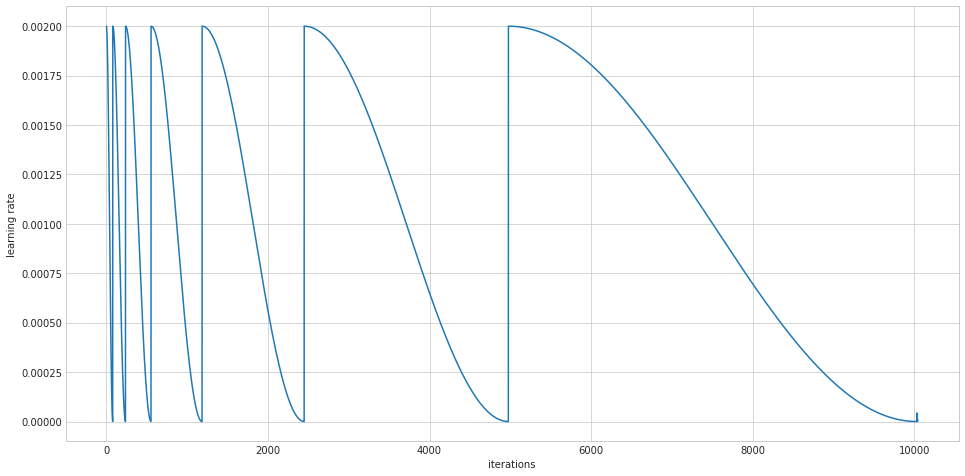

Fold took 115.802s

Running fold 4 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.215474). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108102). Check your callbacks.
  % delta_t_median)


1 New best found: 3.834267857600935e-05
2 New best found: 3.550351087615127e-05
3 New best found: 3.5017047537257896e-05
4 New best found: 3.4860756585840136e-05
5 New best found: 3.429211826296523e-05
6 New best found: 3.388600951002445e-05
7 New best found: 3.364824239979498e-05
9 New best found: 3.34294291867991e-05
10 New best found: 3.321698439976899e-05
11 New best found: 3.3195874012017155e-05
12 New best found: 3.308784297551028e-05
13 New best found: 3.2590630826598496e-05
14 New best found: 3.2548111322103066e-05
15 New best found: 3.2544211453932806e-05
24 New best found: 3.2442456873104675e-05
25 New best found: 3.222826054261532e-05
26 New best found: 3.217774459044449e-05
27 New best found: 3.211146471730899e-05
28 New best found: 3.205138323683059e-05
30 New best found: 3.204957892739913e-05
31 New best found: 3.2035872162668964e-05
49 New best found: 3.198913000378525e-05
50 New best found: 3.194185747706797e-05
52 New best found: 3.193634342605947e-05
53 New best found

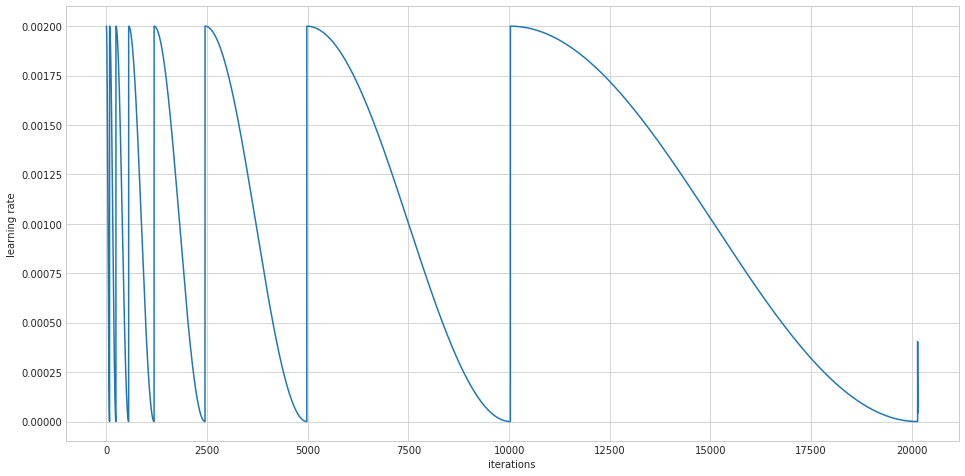

Fold took 212.400s

Running fold 5 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.263685). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132274). Check your callbacks.
  % delta_t_median)


1 New best found: 3.907862977939658e-05
2 New best found: 3.5048780485522004e-05
3 New best found: 3.45093874639133e-05
4 New best found: 3.412879900424741e-05
5 New best found: 3.385667630645912e-05
6 New best found: 3.320751464052592e-05
7 New best found: 3.307475863985019e-05
11 New best found: 3.290889607815188e-05
12 New best found: 3.257641536765732e-05
13 New best found: 3.236055566667346e-05
14 New best found: 3.2195469383441375e-05
15 New best found: 3.217735548823839e-05
23 New best found: 3.207692884898279e-05
25 New best found: 3.2054768367379435e-05
26 New best found: 3.18625297761173e-05
27 New best found: 3.1792492874956224e-05
28 New best found: 3.176895801880164e-05
29 New best found: 3.1703685950196815e-05
30 New best found: 3.168226750276517e-05
31 New best found: 3.16748054974596e-05
50 New best found: 3.163752706022933e-05
53 New best found: 3.161326308327261e-05
55 New best found: 3.158696224709274e-05
56 New best found: 3.1498715859197545e-05
57 New best found: 3

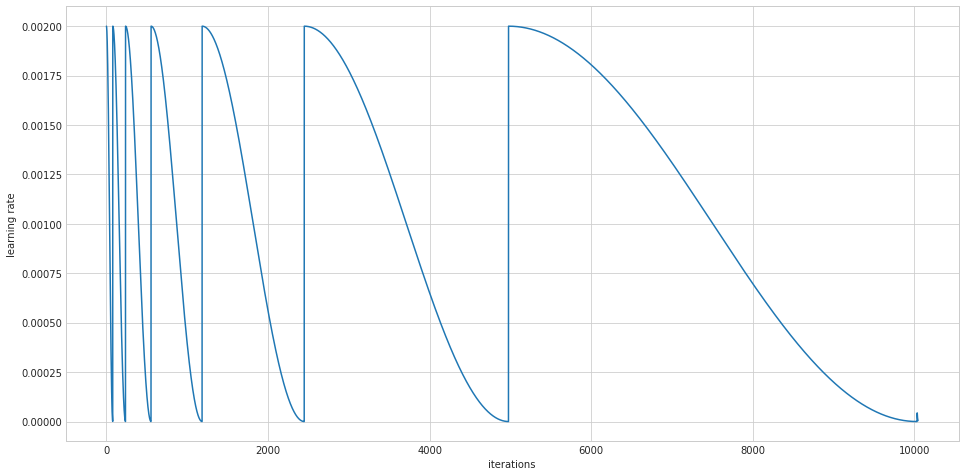

Fold took 137.538s

Running fold 6 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.253196). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126981). Check your callbacks.
  % delta_t_median)


1 New best found: 3.893351560691371e-05
2 New best found: 3.526255533943186e-05
3 New best found: 3.486036665708525e-05
4 New best found: 3.4764638706110415e-05
5 New best found: 3.3582026607473384e-05
6 New best found: 3.3282794302795084e-05
7 New best found: 3.32131367031252e-05
10 New best found: 3.313942458335077e-05
11 New best found: 3.280293654388515e-05
13 New best found: 3.247338003566256e-05
15 New best found: 3.243100924300961e-05
22 New best found: 3.228678966261214e-05
24 New best found: 3.214158932387363e-05
26 New best found: 3.210358580108732e-05
27 New best found: 3.1988602929050103e-05
28 New best found: 3.1924178810731976e-05
29 New best found: 3.19149803093751e-05
30 New best found: 3.18873553085723e-05
31 New best found: 3.188433844334213e-05
55 New best found: 3.1813865735603034e-05
56 New best found: 3.17901700764196e-05
57 New best found: 3.1785022219992246e-05
60 New best found: 3.1770467897877096e-05
61 New best found: 3.175642092319322e-05
62 New best found: 

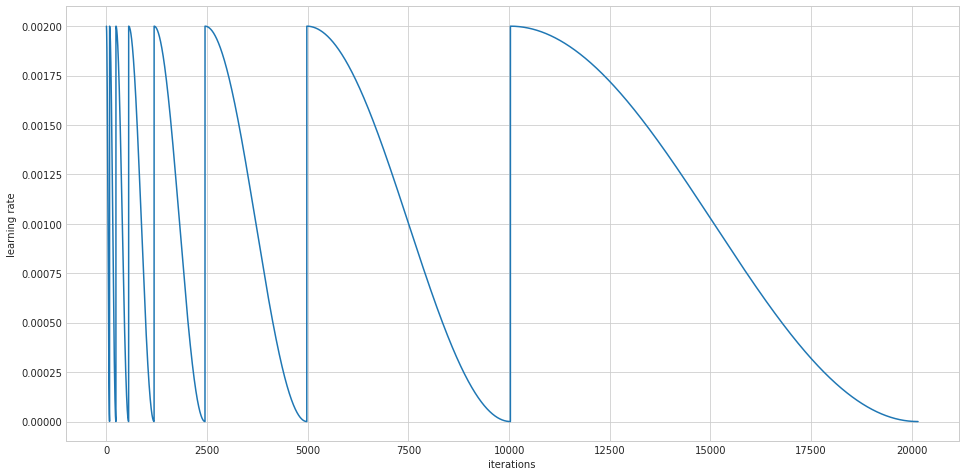

Fold took 266.508s

Running fold 7 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.312667). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157305). Check your callbacks.
  % delta_t_median)


1 New best found: 3.8652066023496446e-05
2 New best found: 3.5253597667906434e-05
3 New best found: 3.4810823378211356e-05
5 New best found: 3.3790763767319734e-05
6 New best found: 3.3435603090038054e-05
7 New best found: 3.324257064377889e-05
10 New best found: 3.32417592042475e-05
11 New best found: 3.301575571967988e-05
13 New best found: 3.26108050183393e-05
14 New best found: 3.249937726650387e-05
15 New best found: 3.2468936272198336e-05
24 New best found: 3.23505089385435e-05
26 New best found: 3.220173261797754e-05
28 New best found: 3.211407813068945e-05
29 New best found: 3.209098498919047e-05
51 New best found: 3.198318451613886e-05
52 New best found: 3.1982131671975365e-05
60 New best found: 3.195041188446339e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=4.342114733391104e-05
Early stopping after 137 epochs
Score is: {'loss': 3.195041188446339e-05, 'wAUC': 0.06403375363282571, 'AUC': 0.09860364427837065, 'AMS': 4.056429736361915, 'cut': 0.975808143

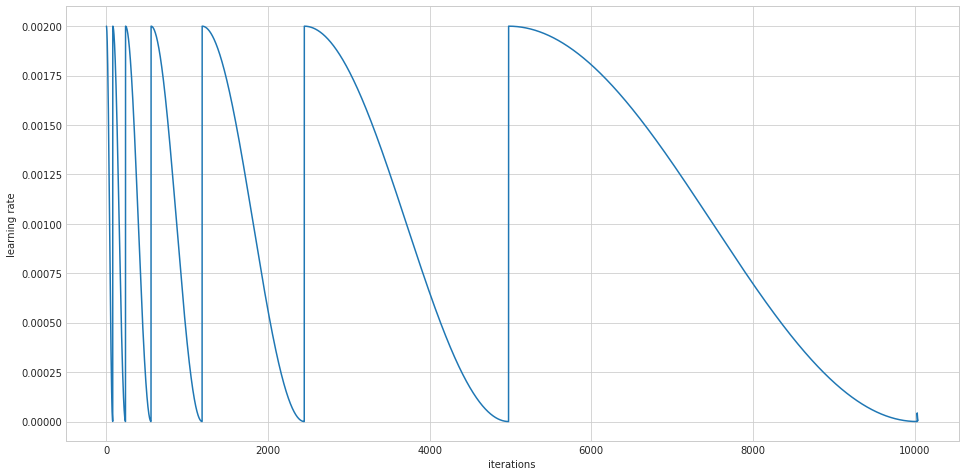

Fold took 142.165s

Running fold 8 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.281593). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141240). Check your callbacks.
  % delta_t_median)


1 New best found: 3.895720745052029e-05
2 New best found: 3.646584068236947e-05
3 New best found: 3.494059934070067e-05
5 New best found: 3.433724422176454e-05
6 New best found: 3.364289777824975e-05
7 New best found: 3.348410873954458e-05
12 New best found: 3.3033988476037907e-05
13 New best found: 3.29301240071004e-05
14 New best found: 3.286298002825171e-05
15 New best found: 3.284943832556586e-05
22 New best found: 3.274099698705378e-05
24 New best found: 3.2663615461752006e-05
25 New best found: 3.2504191396055444e-05
29 New best found: 3.247254467935174e-05
30 New best found: 3.244690361315443e-05
31 New best found: 3.243777321103265e-05
48 New best found: 3.23868812838809e-05
52 New best found: 3.2280843381233905e-05
58 New best found: 3.222747745722691e-05
61 New best found: 3.221498797201384e-05
62 New best found: 3.2214672143600496e-05
63 New best found: 3.2213814113592564e-05
CosineAnneal stalling after 255 epochs, entering redux decay at LR=7.721747127654725e-10
Early stopp

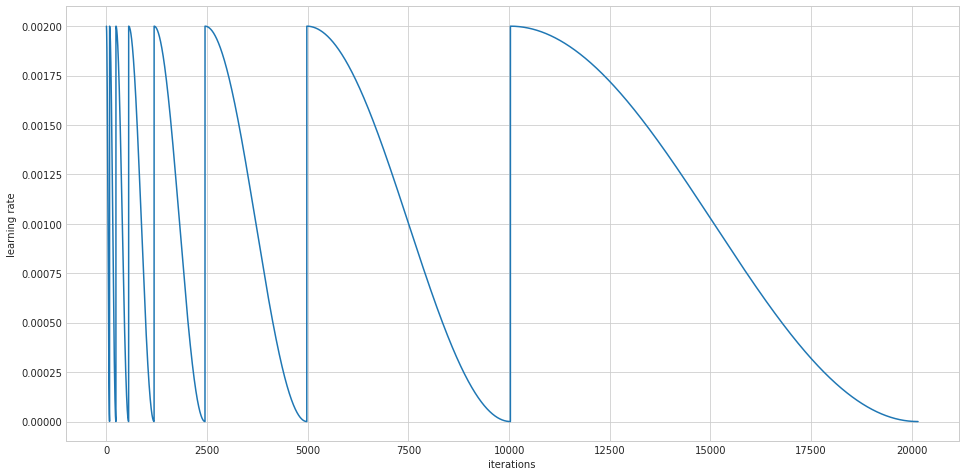

Fold took 257.152s

Running fold 9 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.316242). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158661). Check your callbacks.
  % delta_t_median)


1 New best found: 3.8666038230741596e-05
2 New best found: 3.55944800276427e-05
3 New best found: 3.5070879160931956e-05
5 New best found: 3.443471208458214e-05
6 New best found: 3.3670162179570325e-05
7 New best found: 3.350918473598788e-05
11 New best found: 3.314766861890713e-05
12 New best found: 3.297979522323338e-05
13 New best found: 3.2775738731190535e-05
14 New best found: 3.272427256989436e-05
15 New best found: 3.270334474727028e-05
22 New best found: 3.266654079622843e-05
23 New best found: 3.251769871675822e-05
24 New best found: 3.236468161502512e-05
27 New best found: 3.231774927249301e-05
28 New best found: 3.2167288617705214e-05
30 New best found: 3.214945450486333e-05
46 New best found: 3.208438674647813e-05
53 New best found: 3.205935655238629e-05
55 New best found: 3.195380109609035e-05
57 New best found: 3.19125038302915e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=0.00016922145506649918
Early stopping after 137 epochs
Score is: {'loss': 3

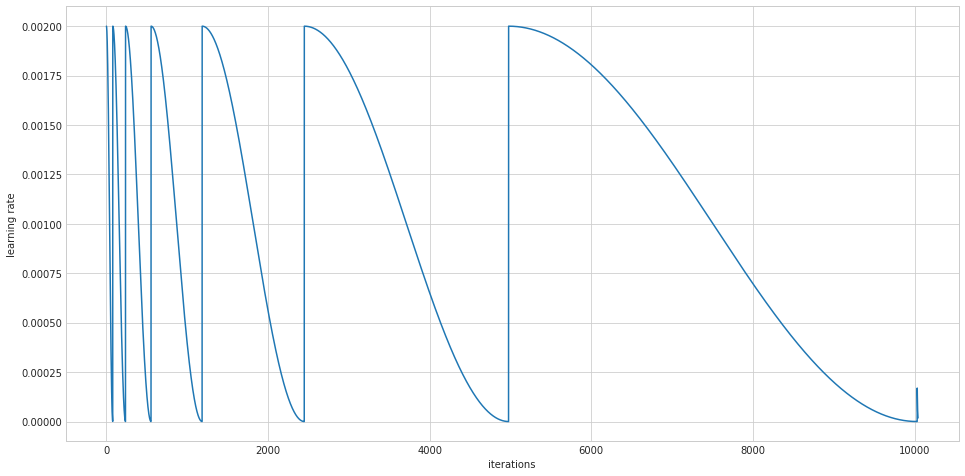

Fold took 135.147s

Running fold 10 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.332793). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166983). Check your callbacks.
  % delta_t_median)


1 New best found: 3.9048866217056325e-05
2 New best found: 3.581484234726339e-05
3 New best found: 3.52444432362587e-05
4 New best found: 3.476594052662493e-05
5 New best found: 3.429021881157961e-05
6 New best found: 3.396428426537927e-05
7 New best found: 3.386668914047296e-05
9 New best found: 3.3779489190471635e-05
10 New best found: 3.371051754629755e-05
11 New best found: 3.3495883760755424e-05
12 New best found: 3.324309557138458e-05
13 New best found: 3.297795776634413e-05
14 New best found: 3.292227893900901e-05
15 New best found: 3.289400763678172e-05
23 New best found: 3.270956761343452e-05
26 New best found: 3.268853499413676e-05
27 New best found: 3.25328446401257e-05
28 New best found: 3.248036573567337e-05
29 New best found: 3.2479201855862874e-05
30 New best found: 3.246321392258246e-05
31 New best found: 3.245970403923026e-05
49 New best found: 3.24101969418005e-05
54 New best found: 3.239548284027798e-05
55 New best found: 3.226664311556737e-05
58 New best found: 3.22

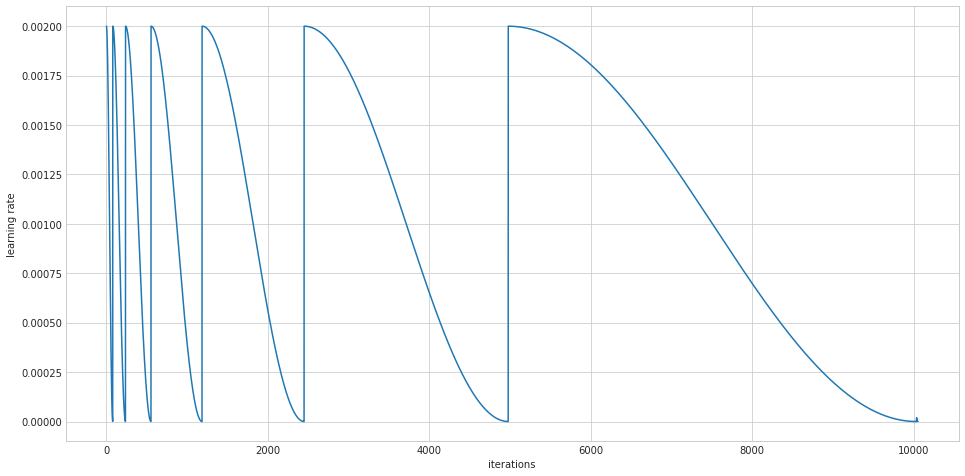

Fold took 145.339s


______________________________________
Training finished
Cross-validation took 1827.249s 


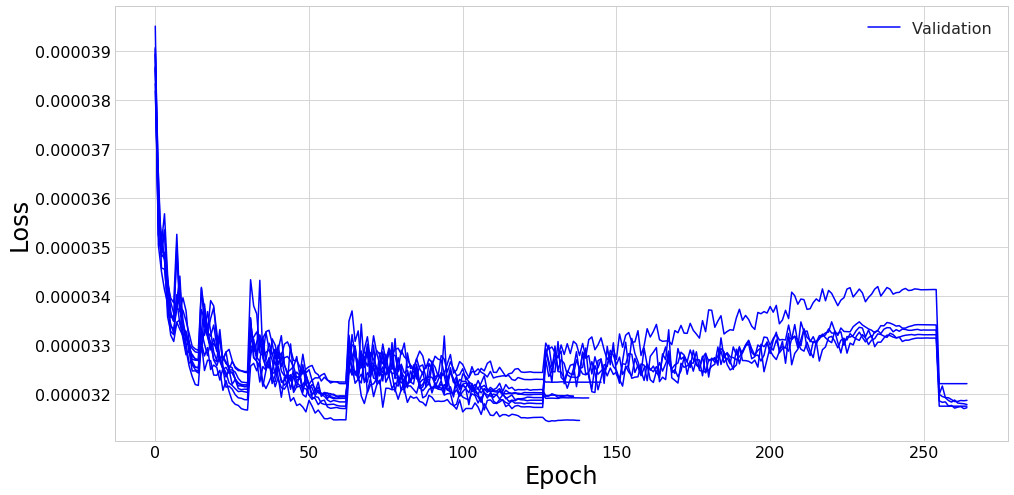

Mean loss = 3.187e-05 +- 7e-08
Mean wAUC = 0.0637 +- 0.0002
Mean AUC = 0.0996 +- 0.0006
Mean AMS = 3.9 +- 0.1
Mean cut = 0.962 +- 0.006
______________________________________



In [7]:
results, histories = batchTrainClassifier(trainData, nSplits, getModel, 
                                          {**modelParams, 'compileArgs':{**compileArgs, 'lr':2e-3}},
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          cosAnnealMult=2, plotLR=1, reduxDecay=1,
                                          patience=patience, verbose=1, amsSize=250000)

## Construct ensemble

In [8]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [9]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 4 with loss = 3.14401249110233e-05
Model 1 is 3 with loss = 3.167605252674548e-05
Model 2 is 5 with loss = 3.1753759254934266e-05
Model 3 is 1 with loss = 3.1784107508802465e-05
Model 4 is 0 with loss = 3.1843169386139114e-05
Model 5 is 8 with loss = 3.19125038302915e-05
Model 6 is 2 with loss = 3.191284927864411e-05
Model 7 is 6 with loss = 3.195041188446339e-05
Model 8 is 7 with loss = 3.2213814113592564e-05
Model 9 is 9 with loss = 3.2241796406653954e-05


## Response on validation data

In [10]:
valData = BatchYielder(h5py.File(dirLoc + 'val.hdf5', "r+"))

In [11]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.001359607524400053s per sample

Predicting batch 2 out of 10
Prediction took 0.0002513562410000304s per sample

Predicting batch 3 out of 10
Prediction took 0.0002505736772000091s per sample

Predicting batch 4 out of 10
Prediction took 0.000250425078400076s per sample

Predicting batch 5 out of 10
Prediction took 0.0002537792097999045s per sample

Predicting batch 6 out of 10
Prediction took 0.0002488034121997771s per sample

Predicting batch 7 out of 10
Prediction took 0.00025078787679995s per sample

Predicting batch 8 out of 10
Prediction took 0.0002546414450000157s per sample

Predicting batch 9 out of 10
Prediction took 0.00025338439699989975s per sample

Predicting batch 10 out of 10
Prediction took 0.0002507167588002631s per sample



In [12]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source))))

Testing ROC AUC: unweighted 0.9029299054189924, weighted 0.9356940658872088


In [13]:
amsScanSlow(convertToDF(valData.source))

50000 candidates loaded


(3.968952945005839, 0.96132994)

In [14]:
%%time
bootstrapMeanAMS(convertToDF(valData.source), N=512)

50000 candidates loaded

Mean AMS=4.0+-0.2, at mean cut of 0.96+-0.01
Exact mean cut 0.9631114136427641, corresponds to AMS of 3.9258569465289823
CPU times: user 1.75 s, sys: 9.31 s, total: 11.1 s
Wall time: 2min 47s


(4.0, 0.96)

# Test scoring

In [15]:
testData = BatchYielder(h5py.File(dirLoc + 'testing.hdf5', "r+"))

In [16]:
%%time
batchEnsemblePredict(ensemble, weights, testData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.0002928234731636621s per sample

Predicting batch 2 out of 10
Prediction took 0.0002664514911090836s per sample

Predicting batch 3 out of 10
Prediction took 0.00025086456636361784s per sample

Predicting batch 4 out of 10
Prediction took 0.00028497366370909067s per sample

Predicting batch 5 out of 10
Prediction took 0.00033193294230910727s per sample

Predicting batch 6 out of 10
Prediction took 0.00027766745319998085s per sample

Predicting batch 7 out of 10
Prediction took 0.0002519329915999895s per sample

Predicting batch 8 out of 10
Prediction took 0.0002521680015999829s per sample

Predicting batch 9 out of 10
Prediction took 0.00026646722576363326s per sample

Predicting batch 10 out of 10
Prediction took 0.00025310196627274724s per sample

CPU times: user 2min 56s, sys: 7.06 s, total: 3min 3s
Wall time: 2min 30s


In [36]:
scoreTestOD(testData.source, 0.9631114136427641)

Public:Private AMS: 3.5601902746277 : 3.665386798953047


(3.5601902746277, 3.665386798953047)

# Save/Load

In [37]:
name = "weights/Swish_CLR_Fixed"

In [38]:
saveEnsemble(name, ensemble, weights, compileArgs, overwrite=1)

In [ ]:
ensemble, weights, compileArgs, _, _ = loadEnsemble(name)